## 1 - What is a Category data type?

In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv("P4-Movie-Ratings.csv")

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Film                       559 non-null    object
 1   Genre                      559 non-null    object
 2   Rotten Tomatoes Ratings %  559 non-null    int64 
 3   Audience Ratings %         559 non-null    int64 
 4   Budget (million $)         559 non-null    int64 
 5   Year of release            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [4]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [6]:
movies.columns = ['Film', 'Genre', 'RottenTomatoes', 'AudienceRatings', 'Budget', 'Year']

In [7]:
movies.head()

,Film,Genre,RottenTomatoes,AudienceRatings,Budget,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Film             559 non-null    object
 1   Genre            559 non-null    object
 2   RottenTomatoes   559 non-null    int64 
 3   AudienceRatings  559 non-null    int64 
 4   Budget           559 non-null    int64 
 5   Year             559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [9]:
movies.describe()

,RottenTomatoes,AudienceRatings,Budget,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [10]:
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Film             559 non-null    category
 1   Genre            559 non-null    category
 2   RottenTomatoes   559 non-null    int64   
 3   AudienceRatings  559 non-null    int64   
 4   Budget           559 non-null    int64   
 5   Year             559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [12]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [13]:
movies.describe() # year is no longer here

,RottenTomatoes,AudienceRatings,Budget
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


## 2 - Working with JointPlots

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

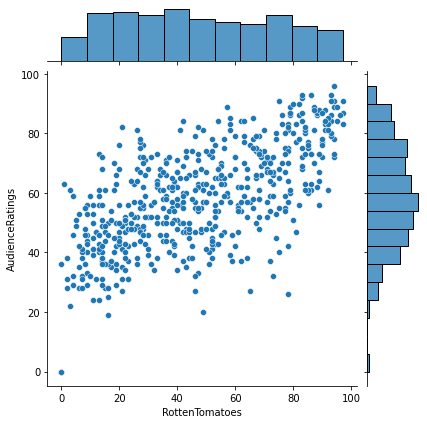

In [15]:
j = sns.jointplot(data=movies, x='RottenTomatoes', y="AudienceRatings")

The scatterplot shows you if there's any relationship or dependency between the audience and the critic rating. 

If you draw a diagonal line on this chart you'll see that overall the audience rating is above the diagonal at a given critic rating. 

For score 20 in instance, the audience rating looks like it's mostly above the diagonal so it's higher than 20 so basically that means that the audience is a bit more forgiving to movies.

But as you go into higher ratings of the critics the audience ratings starts to match the critic rating as well more or less.


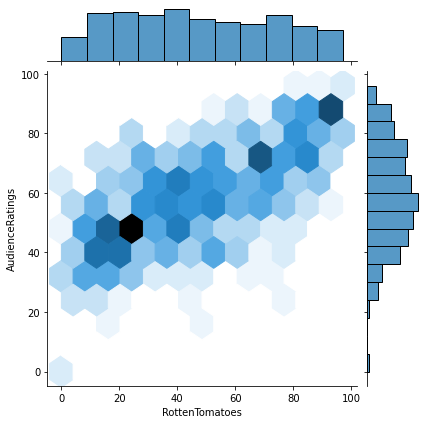

In [16]:
j = sns.jointplot(data=movies, x='RottenTomatoes', y="AudienceRatings", kind = "hex")

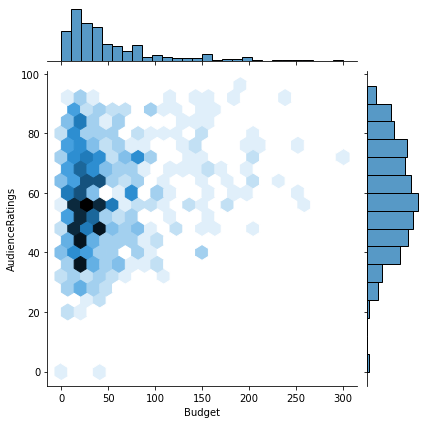

In [17]:
j = sns.jointplot(data=movies, x='Budget', y="AudienceRatings", kind = "hex")

## 3 - Histograms

In [18]:
#applies for all
sns.set_style("darkgrid")

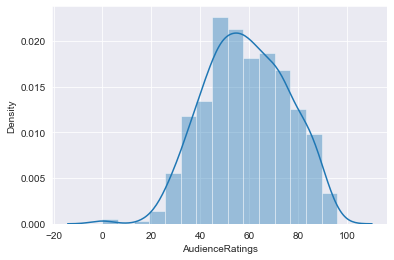

In [19]:
h1 = sns.distplot(movies.AudienceRatings, bins=15)

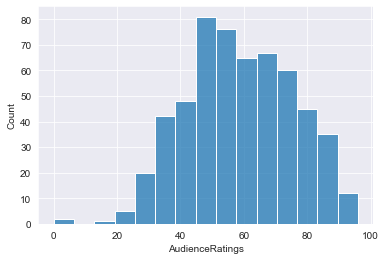

In [20]:
h2 = sns.histplot(movies.AudienceRatings, bins=15)

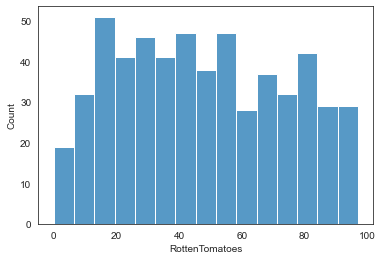

In [21]:
sns.set_style("white")
h2 = sns.histplot(movies.RottenTomatoes, bins=15)

There is a difference between the distributions of critic ratings and audience ratings.

For rotten tomatoes they have certain criteria and rules on how they market the movie and ratings are calculated accordingly and that's why this behavior isn't normally distributed.

Whereas for the audiecen ratings, you've got just emotional type of behavior which is the normal human psychology that is all very often distributed normally.

## 4 - Stacked Histograms in Python

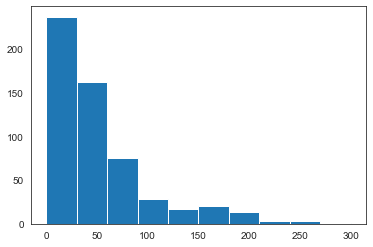

In [22]:
##either like this : h3 = plt.hist(movies.Budget) 
#or

plt.hist(movies.Budget)
plt.show()

In [23]:
movies[movies.Genre == "Drama"]

,Film,Genre,RottenTomatoes,AudienceRatings,Budget,Year
10,88 Minutes,Drama,5,51,30,2007
11,A Dangerous Method,Drama,79,89,20,2011
13,A Serious Man,Drama,89,64,7,2009
18,Albert Nobbs,Drama,53,43,8,2011
23,All Good Things,Drama,33,64,20,2010
...,...,...,...,...,...,...
529,War Horse,Drama,77,73,66,2011
532,Water For Elephants,Drama,60,72,38,2011
534,We Own the Night,Drama,55,63,21,2007
541,Whip It,Drama,84,73,15,2009


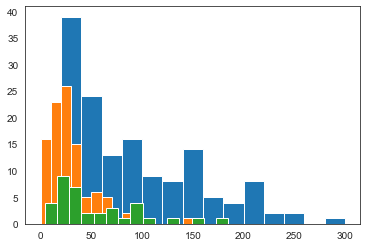

In [24]:
plt.hist(movies[movies.Genre == "Action"].Budget , bins = 15)
plt.hist(movies[movies.Genre == "Drama"].Budget, bins = 15)
plt.hist(movies[movies.Genre == "Thriller"].Budget, bins = 15)
plt.show() #these are overlayed

or

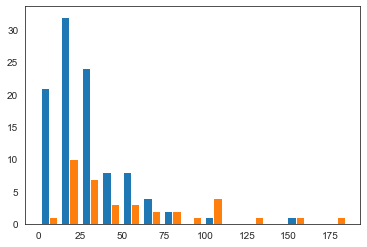

In [25]:
plt.hist([movies[movies.Genre == "Drama"].Budget, movies[movies.Genre == "Thriller"].Budget], bins = 15)
plt.show() 

To make them stacked

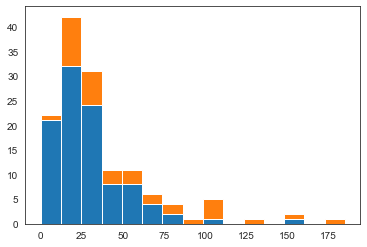

In [26]:
plt.hist([movies[movies.Genre == "Drama"].Budget, movies[movies.Genre == "Thriller"].Budget], bins = 15, stacked=True)
plt.show() # still overlayed

You can manually copy and paste to increase number of genres like:

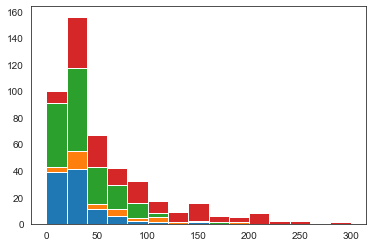

In [27]:
plt.hist([movies[movies.Genre == "Drama"].Budget, movies[movies.Genre == "Thriller"].Budget,
          movies[movies.Genre == "Comedy"].Budget, movies[movies.Genre == "Action"].Budget 
         ], bins = 15, stacked=True)
plt.show() # still overlayed

### Or in a smarter way with iterations like this:

In [28]:
#this prints each movies genre not the categories
# for gen in movies.Genre:
#     print (gen)


In [29]:
for gen in movies.Genre.cat.categories:
    print (gen) #to control if we are returning the correct variables

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


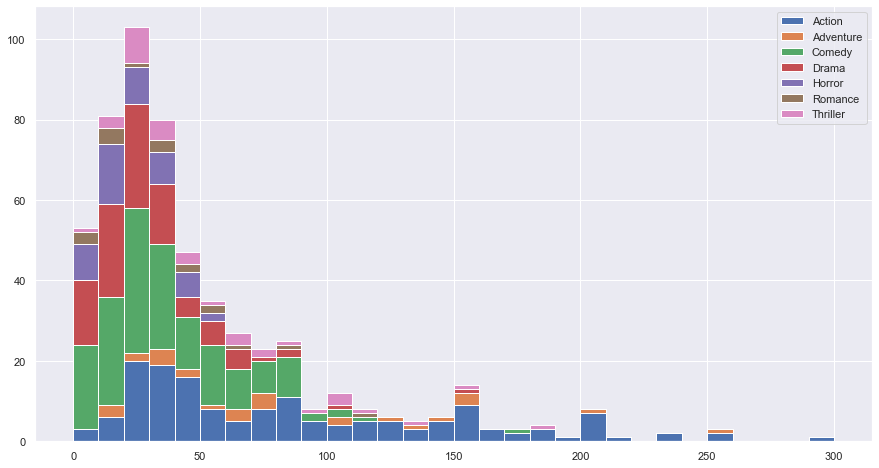

In [30]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(15,8)})
listg = list()
labellist = list()
for gen in movies.Genre.cat.categories:
    listg.append(movies[movies.Genre == gen].Budget)
    labellist.append(gen)
    
h4 = plt.hist(listg, bins = 30 , stacked=True, rwidth = 1, label = labellist)
plt.legend()
# to get rid of <matplotlib.legend.Legend at 0x21b84da47c0> text use plt.show()
plt.show()

## 5 - Creating a KDE Plot

In [31]:
#kernel density estimate plot

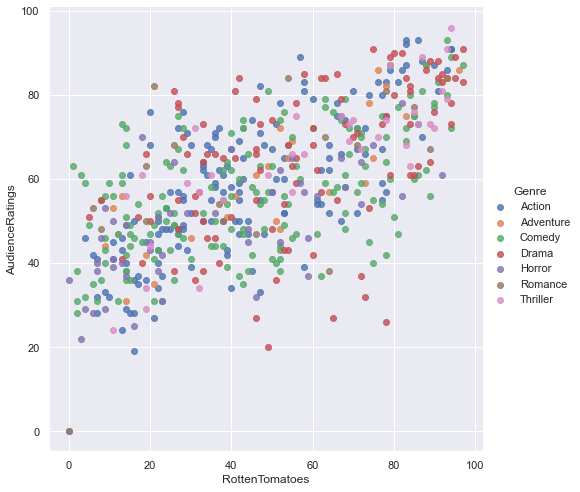

In [32]:
plot1 = sns.lmplot(data=movies, x="RottenTomatoes", y="AudienceRatings", fit_reg=False, hue="Genre", size=7, aspect=1 )

In [33]:
#plot2 = sns.kdeplot(data=movies, x="RottenTomatoes", y="AudienceRatings", fit_reg=False, hue="Genre", size=7, aspect=1 )

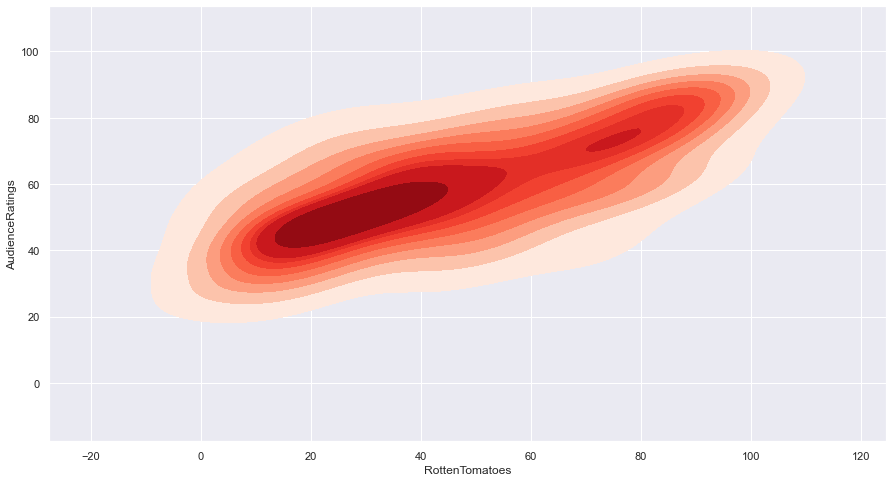

In [34]:
plot2 = sns.kdeplot(movies.RottenTomatoes, movies.AudienceRatings, shade=True, shade_lowest=False, cmap="Reds")


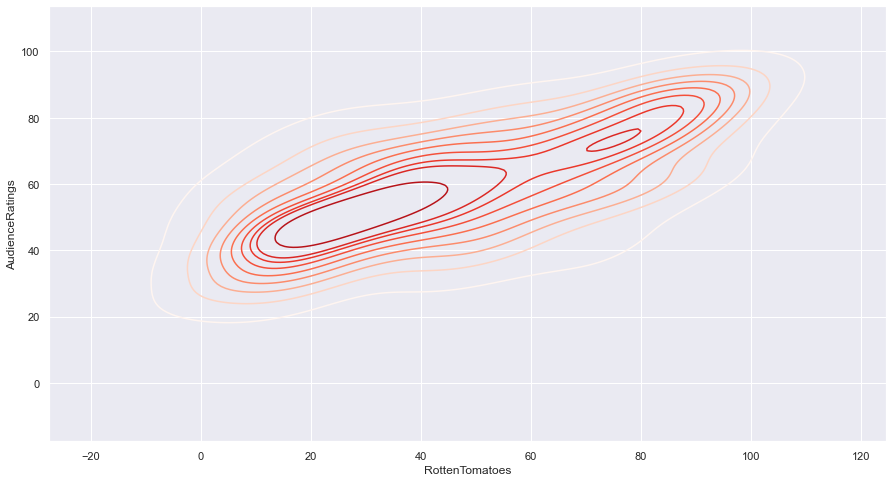

In [35]:
plot3 = sns.kdeplot(movies.RottenTomatoes, movies.AudienceRatings, cmap="Reds")

If you run these together you will see kind of a contour on the edges:

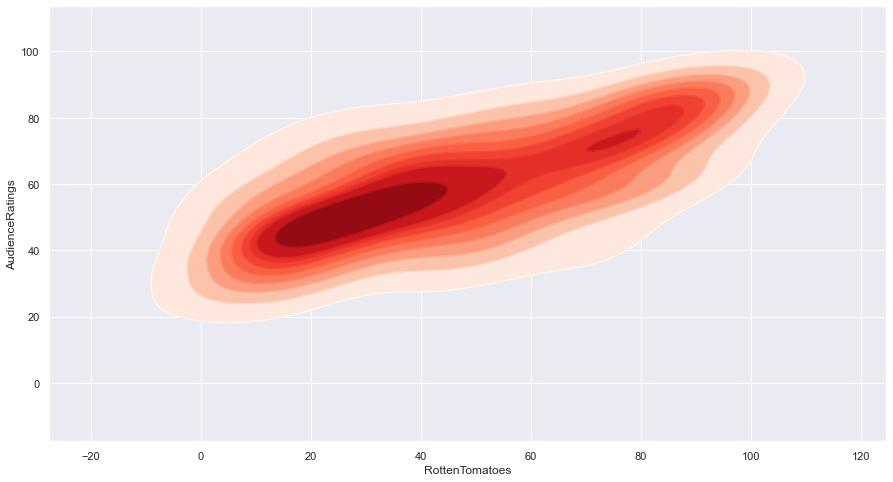

In [36]:
plot2 = sns.kdeplot(movies.RottenTomatoes, movies.AudienceRatings, shade=True, shade_lowest=False, cmap="Reds")
plot3 = sns.kdeplot(movies.RottenTomatoes, movies.AudienceRatings, cmap="Reds")

## 6- Working with Subplots()

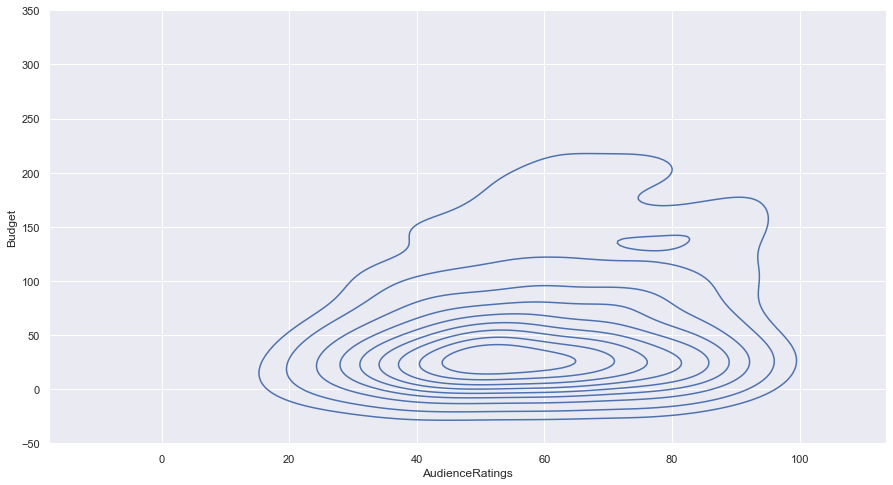

In [37]:
k1= sns.kdeplot(movies.AudienceRatings, movies.Budget)

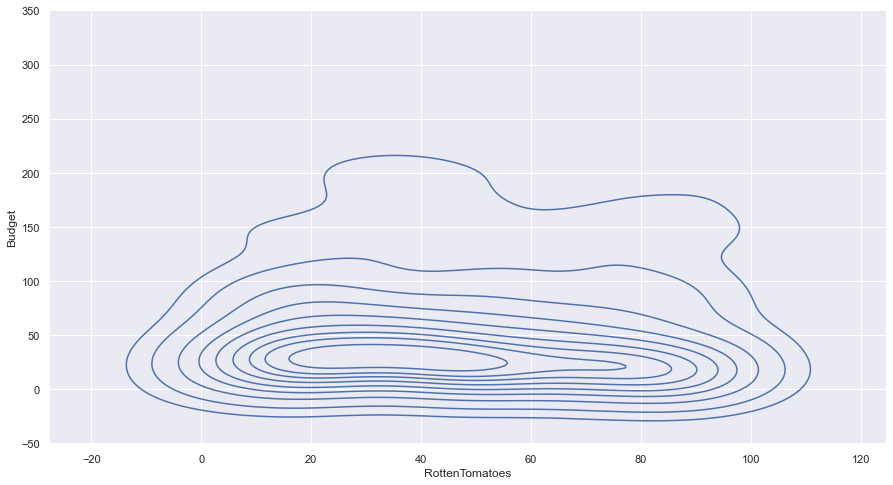

In [38]:
k2= sns.kdeplot(movies.RottenTomatoes, movies.Budget)

To print these as suplots:

f, ax = plt.subplots(1, 2, figsize=(10,5))

where 

f is the figure that's the whole object that we're working with

ax is going to be an array specifying how you can access each one of these figure slots - basically short for axes


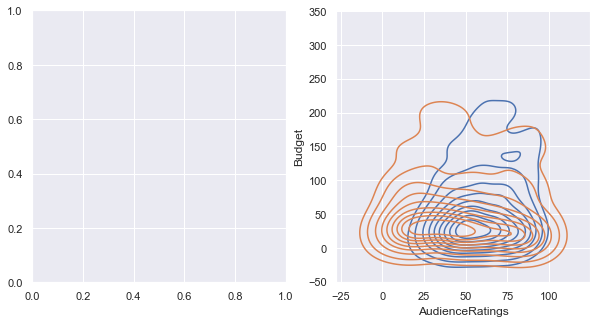

In [39]:
f, ax = plt.subplots(1, 2, figsize=(10,5))
k1= sns.kdeplot(movies.AudienceRatings, movies.Budget)
k2= sns.kdeplot(movies.RottenTomatoes, movies.Budget)

As we can see these are now plotted into one slot and not placed correctly. To fix these, ax parameter should be passed:

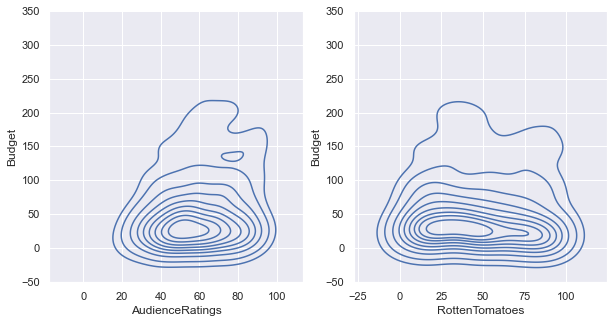

In [40]:
f, ax = plt.subplots(1, 2, figsize=(10,5))
k1= sns.kdeplot(movies.AudienceRatings, movies.Budget, ax=ax[0])
k2= sns.kdeplot(movies.RottenTomatoes, movies.Budget, ax=ax[1])

If you multi dimensional charts (matrix type) then you need to pass ax as multi-dimensional :

[(-20.0, 160.0)]

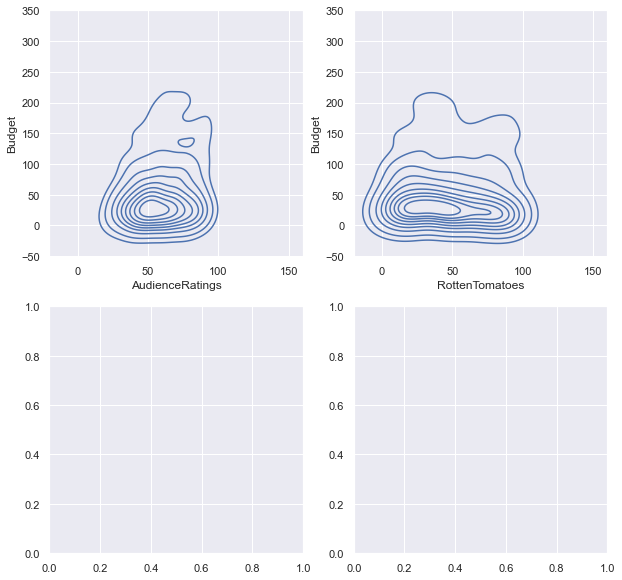

In [41]:
f, ax = plt.subplots(2, 2, figsize=(10,10))
k1= sns.kdeplot(movies.AudienceRatings, movies.Budget, ax=ax[0,0])
k2= sns.kdeplot(movies.RottenTomatoes, movies.Budget, ax=ax[0,1])
#To make the axis intervals has the same starting and end point
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

oe instead of defining k2.set(xlim=(-20,160)) for every other plot we can just defined sharex and sharey parameters:

[(-50.0, 250.0)]

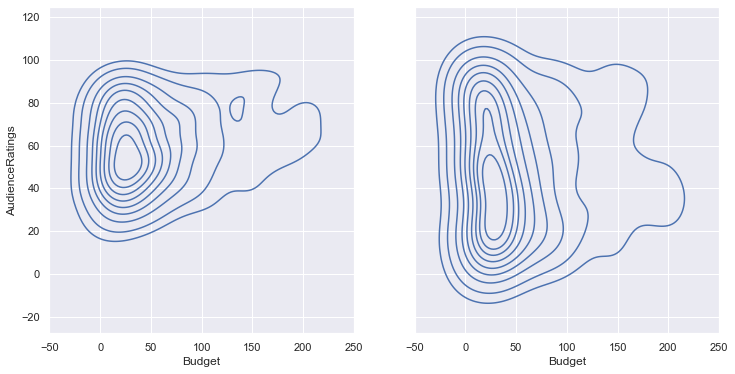

In [42]:
f, ax = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
k1= sns.kdeplot(movies.Budget, movies.AudienceRatings, ax=ax[0])
k2= sns.kdeplot(movies.Budget, movies.RottenTomatoes, ax=ax[1])
#To make the axis intervals has the same starting and end point
k1.set(xlim=(-50,250))

## 7-  Violinplots vs Boxplots

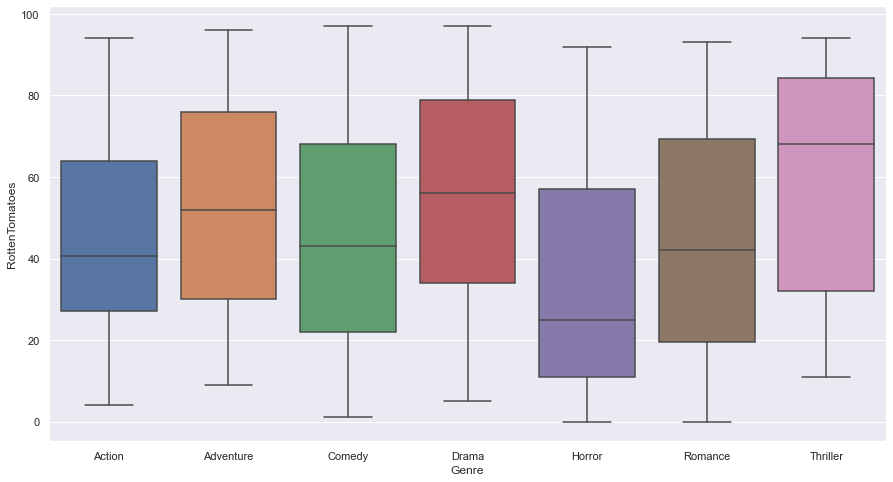

In [43]:
b = sns.boxplot(data=movies, x='Genre', y='RottenTomatoes')

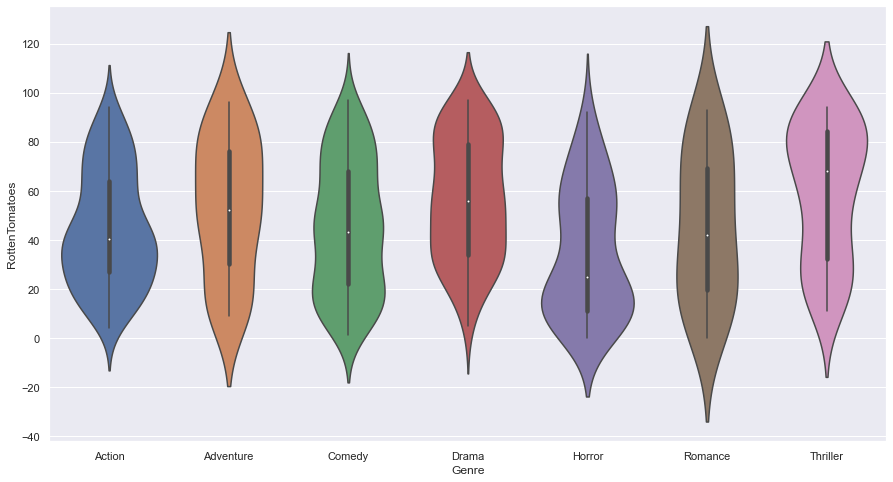

In [44]:
v = sns.violinplot(data=movies, x='Genre', y='RottenTomatoes')

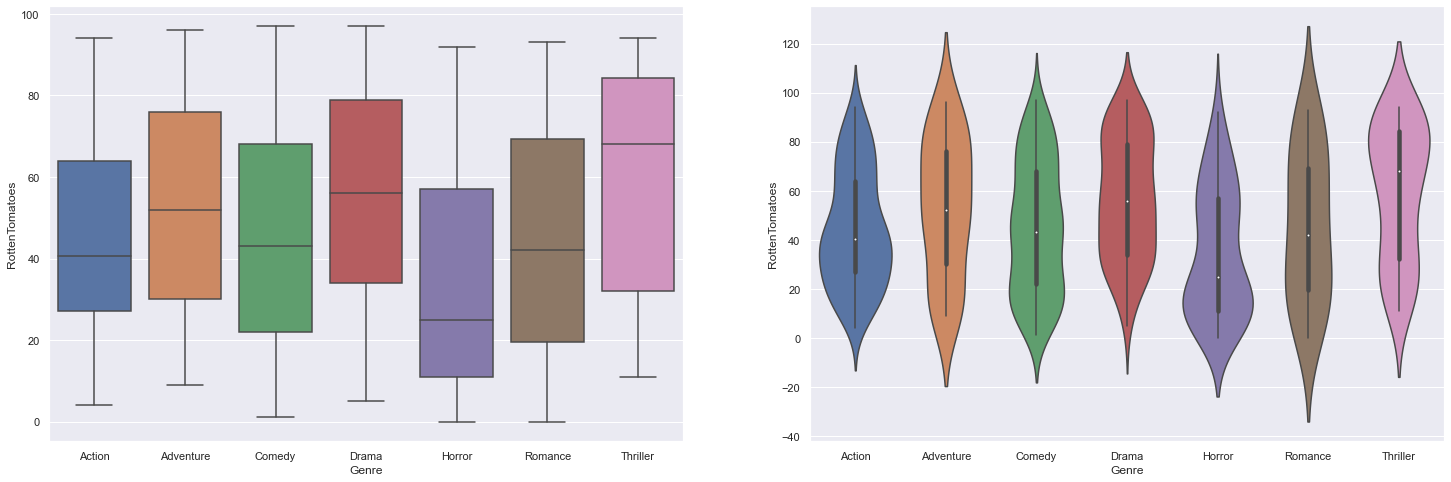

In [45]:
f, ax = plt.subplots(1, 2, figsize=(25,8))
b = sns.boxplot(movies.Genre, movies.RottenTomatoes, ax=ax[0])
v = sns.violinplot(movies.Genre, movies.RottenTomatoes, ax=ax[1])


For instance you can see that in horror movies the critic ratings are generally low, the median here is about 22 and it's the lowest median that you have out of all of them. And the highest median you've got for thrillers, thrillers are getting the best critic ratings according to these box plots. 

You can get more insights out of here especially if you want to compare two different genres side by side. If you want to compare action versus comedy you can see that their median is quite about the same. But the box plot for comedy is a bit more stretched out than for action. That means it's more likely that you will be further away from the median in the comedy whereas action it's a bit more compact. Boxplot kind of tries to tell you that through the core tiles so tell you it tries to split up your data into core tiles and that when the part is smaller that means more dots fall.

So the violinplot tells us pretty much the same thing but it has a bit different characteristics. For the violin plots, the width tells you the number of points that fall into that certain area. Meaning that there's more observations that can be found here.

For some specific cases violinplot may show more detailed insights. For example if you chech the years 2008 and 2011 in the graph below:

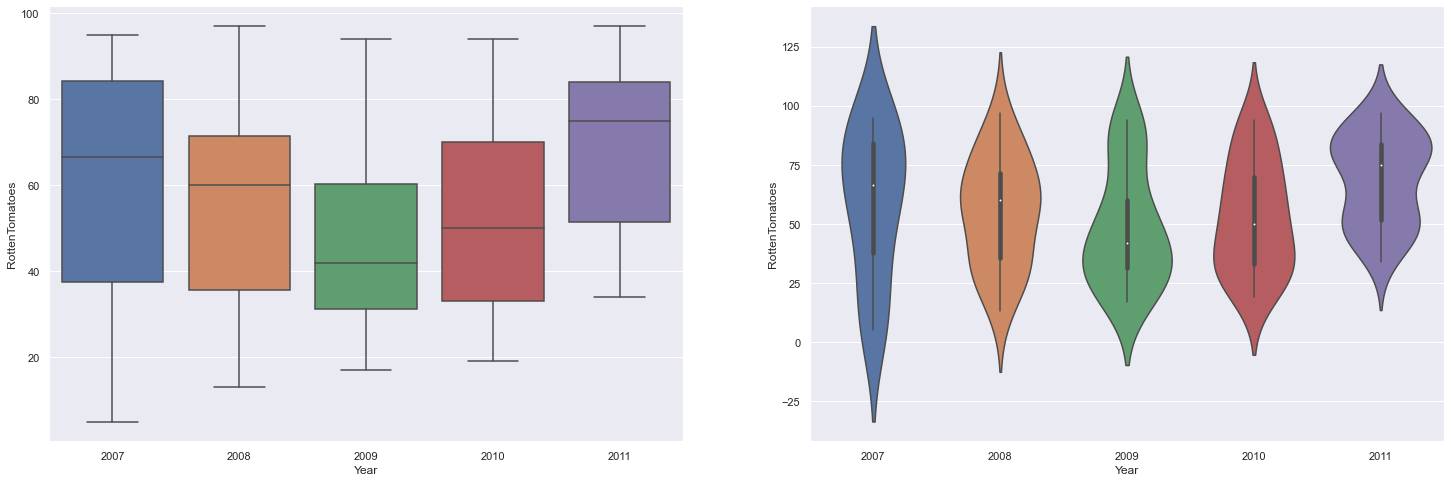

In [46]:
f, ax = plt.subplots(1, 2, figsize=(25,8))
b1 = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year', y='RottenTomatoes', ax=ax[0])
v1 = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='RottenTomatoes', ax=ax[1])


On the box plot they look pretty similar shape wise and median wise. However on the violinplot you can see where 2008 has a more smooth distribution, 2011 has 2 concentration points with one being more dense than the other.

So it is important to always check for yourself which one is better for your storytelling.

## 8-  Creating a Facet Grid

While they are different things, the logic is kinda similar to subplots.

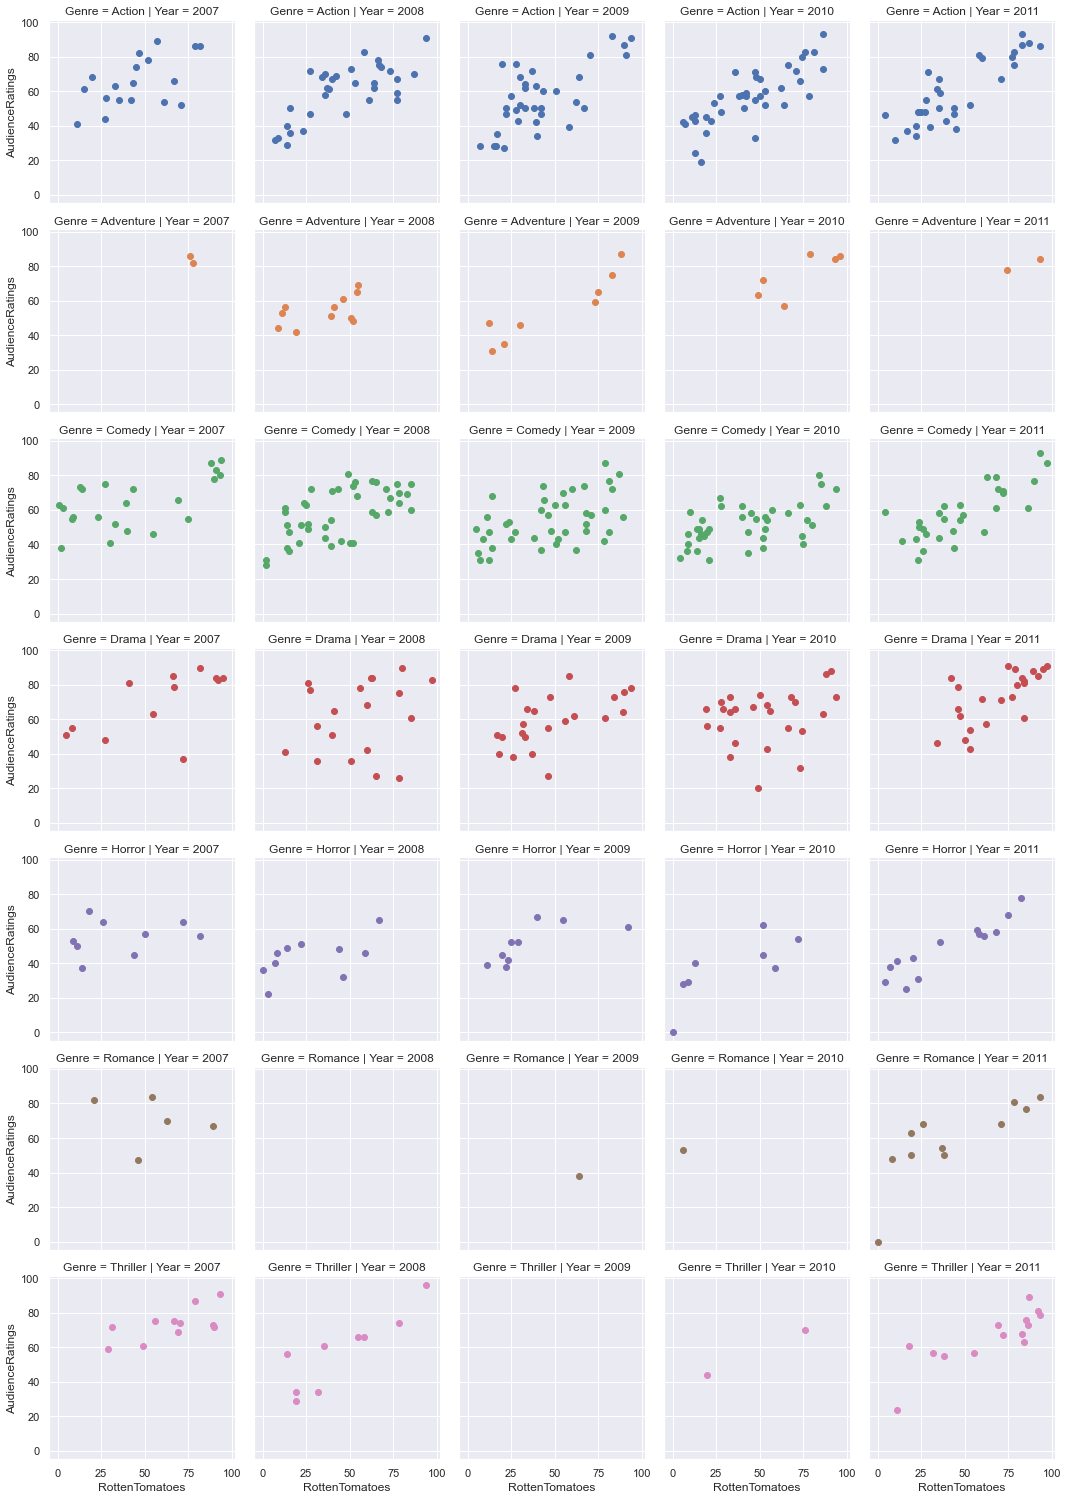

In [47]:
#This just draws the empty figure slots. Row count will be number of genre types and column count will be the years
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')

#To populate the slots with the type of graph you want you need to use g.map
#g.map is a plotting function to each facet's subset of the data
#For example you create a typical scatter plot like:
#plt.scatter(movies.RottenTomatoes, movies.AudienceRatings)

#In a similar manner the g.map works as g.map(func, *args, **kwargs) where you pass your desired 
# function (for this case it will be plt.scatter) and desired variables.  

g = g.map(plt.scatter, 'RottenTomatoes', 'AudienceRatings')
#since it was passed that the movies data set will be used before, no need to redefine as movies.RottenTomatoes


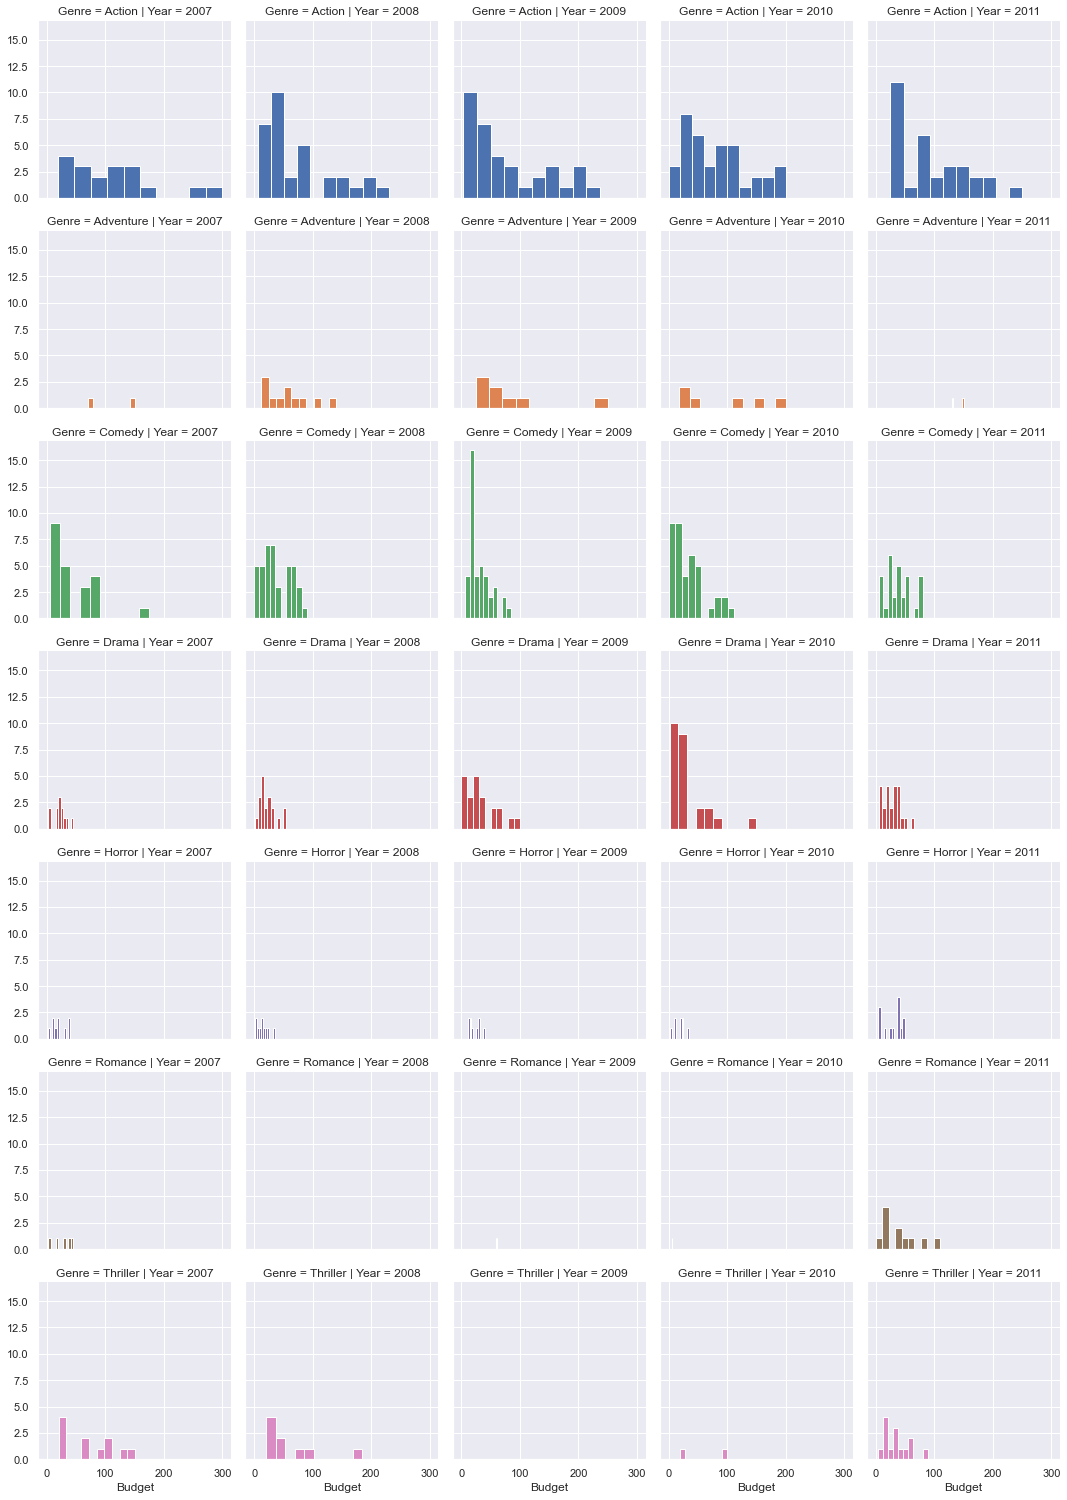

In [48]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'Budget')

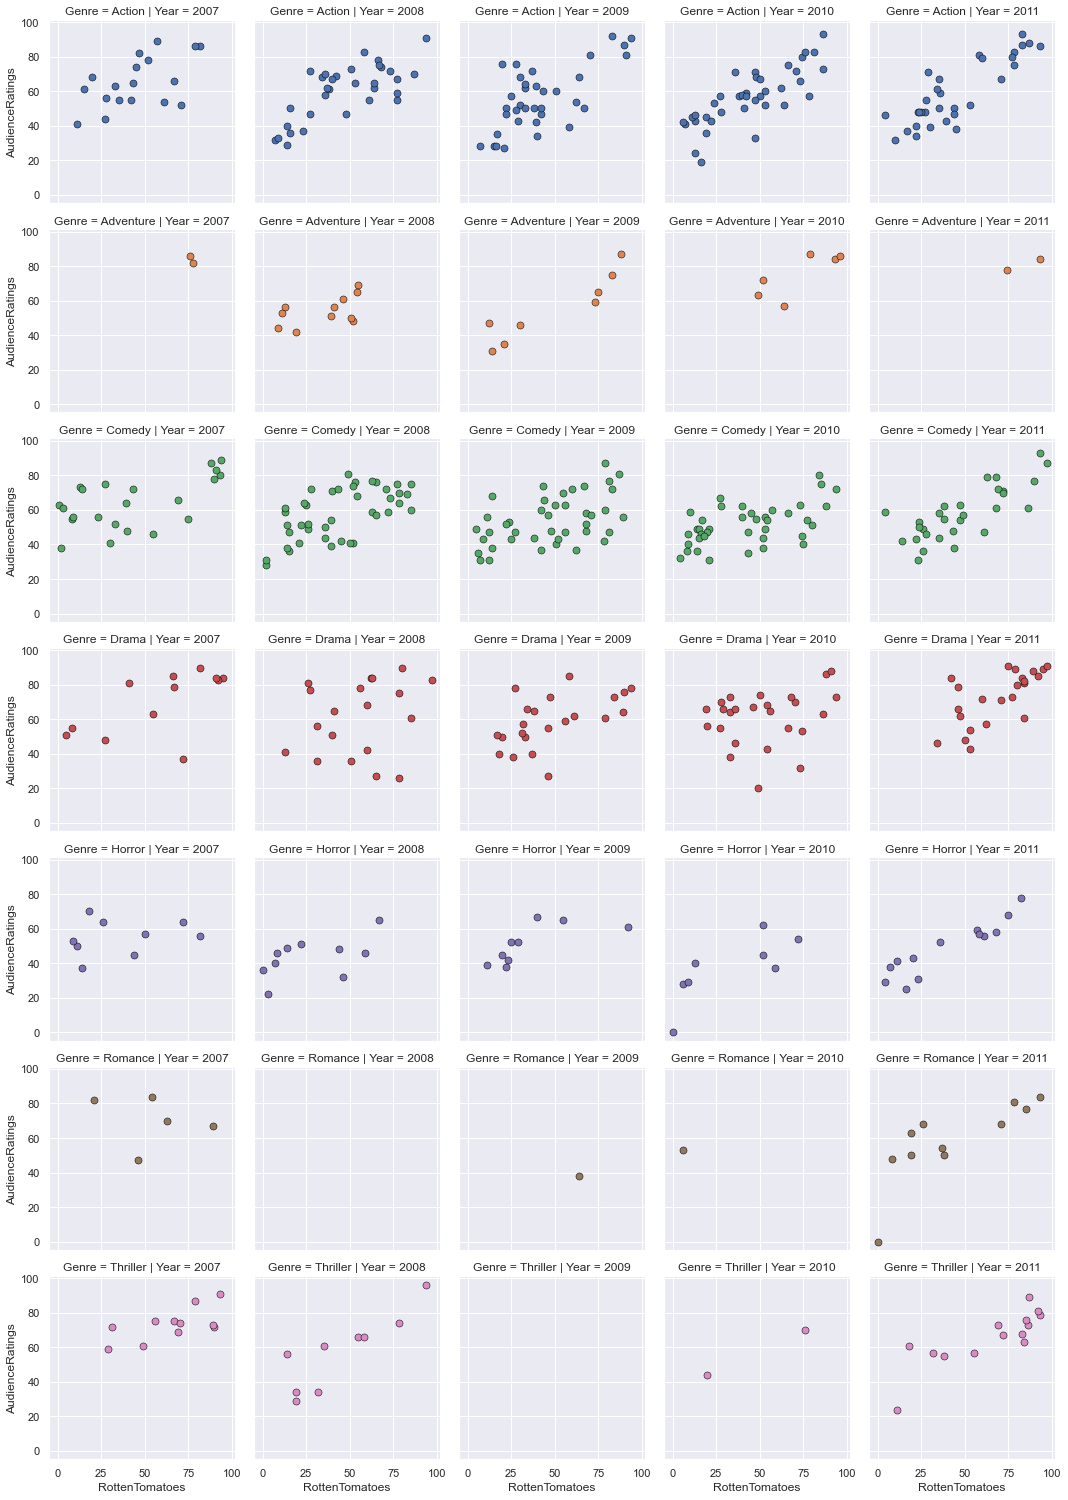

In [49]:
#back to scatterplot with some customization:
#we need to remember that g.map works as g.map(func, *args, **kwargs)
#means we can pass additional arguments, in this case we will use it for customization

g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')

#we will create a dicstionary with the variables we want for customization such as size, linewidth, etc.
kws = dict(s=50, linewidth=0.5, edgecolor='black')

#and pass it to gmap
g = g.map(plt.scatter, 'RottenTomatoes', 'AudienceRatings', **kws)

## 9-  Coordinates and Diagonals

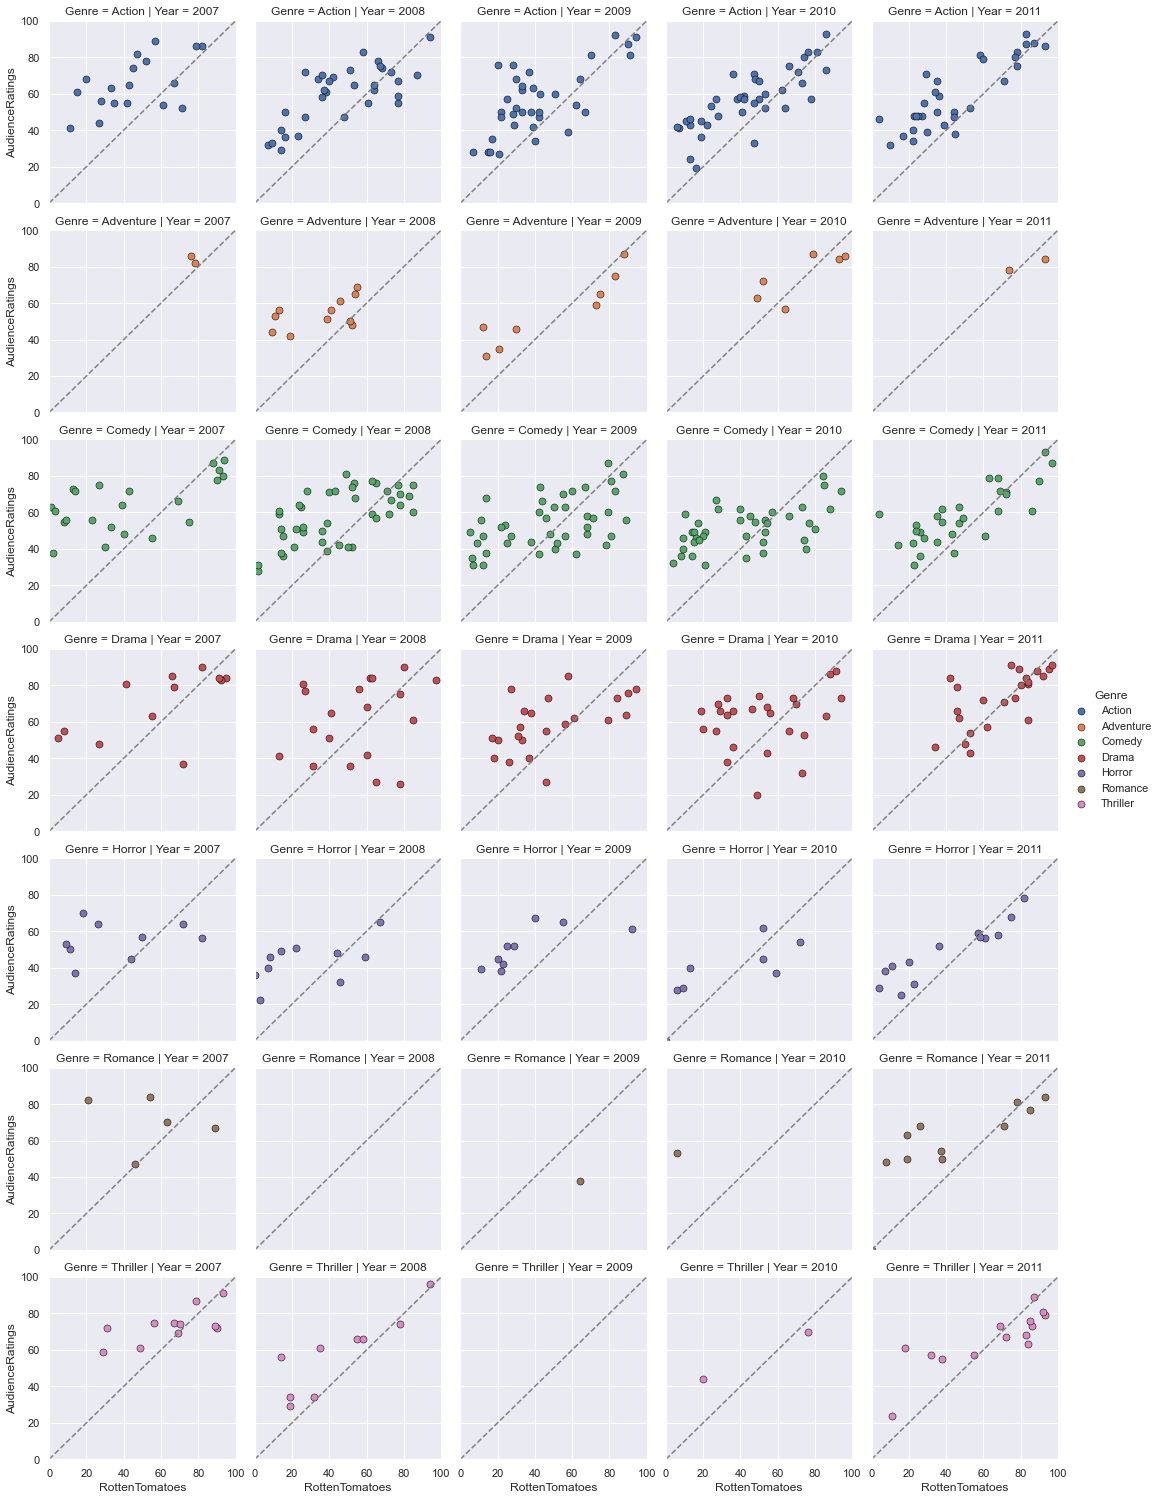

In [50]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'RottenTomatoes', 'AudienceRatings', **kws)

#for giving the stat and end points for axes
g.set(xlim=(0,100), ylim=(0,100)) #for ratings it can only be between 0 and 100

for ax in g.axes.flat: 
#g.axes allows us to access all of the slots given and .flat enables us to iterate 
#each of slots as if it was a list, kind of disregarding the multi-dimensional nature of the facet
    ax.plot((0,100), (0,100), c='gray', ls='--')

g.add_legend()

So each one of these dots is a movie. And here you can see that whenever dot is above the diagonal;it means that audience rating for that movie was greater than the critic creating.

Here you can see that in 2009 in the genre of action the audience gave much better ratings and the critics overall. 

In drama in 2011 looks like the critics were more prone to give better ratings. And the same thing for Thriller in 2011 critics gave better ratings and then the audience especially in the higher numbers such as 60s 80s 

Diagonal line is definitely a very simple tool but a very convenient tool to helps us analyze these charts better.

## 10-  Building Dashboards in Python

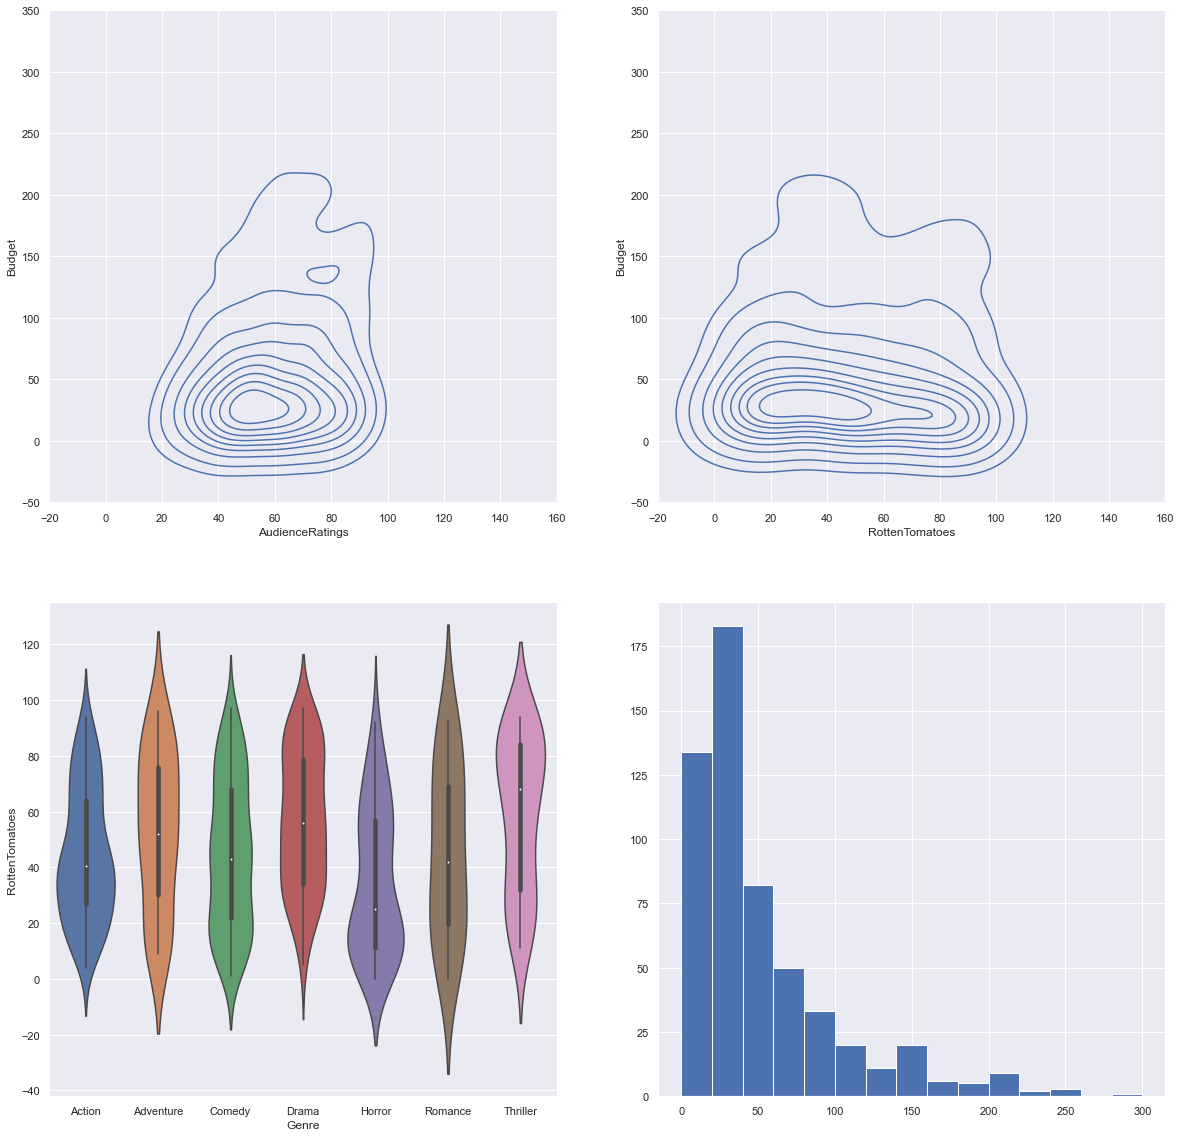

In [51]:
f, ax = plt.subplots(2, 2, figsize=(20,20))
d1= sns.kdeplot(movies.AudienceRatings, movies.Budget, ax=ax[0,0])
d2= sns.kdeplot(movies.RottenTomatoes, movies.Budget, ax=ax[0,1])
d3 = sns.violinplot(data=movies, x='Genre', y='RottenTomatoes', ax=ax[1,0])

#For seaborn plots this is a direct process where you pass the ax variable like ax=ax[1,0]
#For non seaborn plots it is a bit different
#If you add a non-seaborn plot as it is and run the code you will get an error
#What you need to do is pass the location (ax) first and then give the graph you want

ax[1,1].hist(movies.Budget, bins=15)

d1.set(xlim=(-20,160))
d2.set(xlim=(-20,160))

plt.show()

## 11-  Styling Dashboards in Python

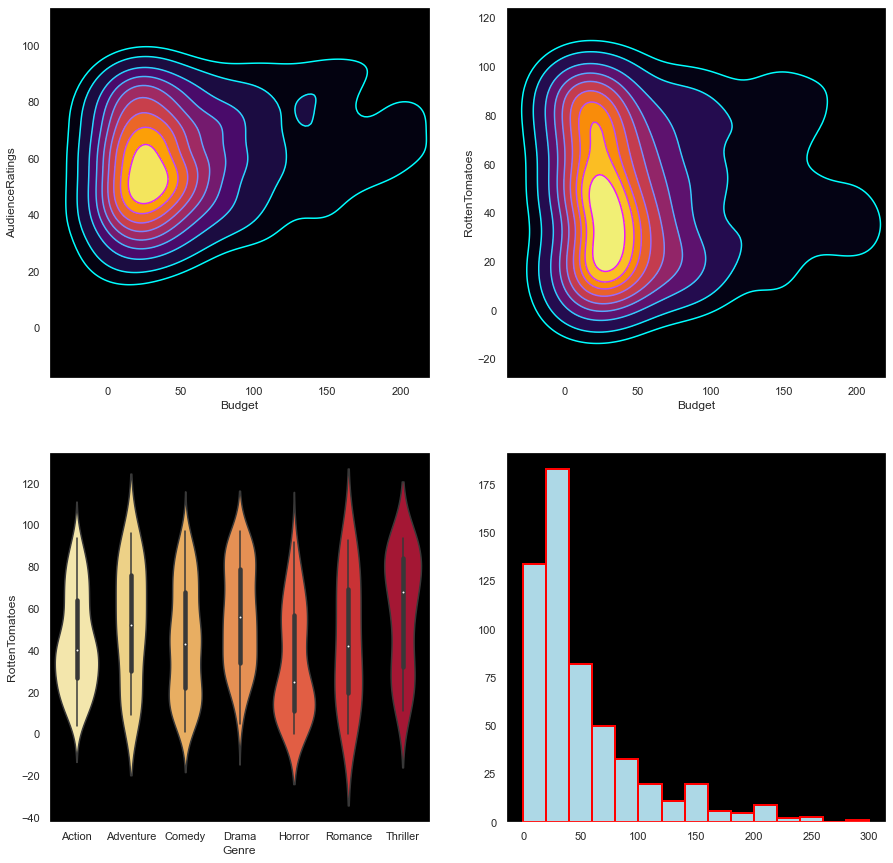

In [52]:
sns.set_style("dark", {"axes.facecolor": "black"})

f, ax = plt.subplots(2, 2, figsize=(15,15))

#plot [0,0]
d1= sns.kdeplot(movies.Budget, movies.AudienceRatings,  \
               shade=True, shade_lowest=False, cmap="inferno", ax=ax[0,0])
d1a= sns.kdeplot(movies.Budget, movies.AudienceRatings,  \
                 cmap="cool", ax=ax[0,0])

#plot [0,1]
d2= sns.kdeplot(movies.Budget, movies.RottenTomatoes,  ax=ax[0,1], \
               shade=True, shade_lowest=False, cmap="inferno")
d2a= sns.kdeplot(movies.Budget, movies.RottenTomatoes,  ax=ax[0,1], \
               cmap="cool")

#plot [1,0]
d3 = sns.violinplot(data=movies, x='Genre', y='RottenTomatoes', ax=ax[1,0], \
                   palette ="YlOrRd" )


#plot [1,1]
ax[1,1].hist(movies.Budget, bins=15, color = "lightblue", ec="red", lw=2)

d1.set(xlim=(-40,220))
d2.set(xlim=(-40,220))
plt.show()

Easiest way to find the list of cmap palettes is wrting the name worng like bluess instead of blues. So it will return an error with a list of names included:


ValueError: 'Bluess' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

## 12- Finishing Touches

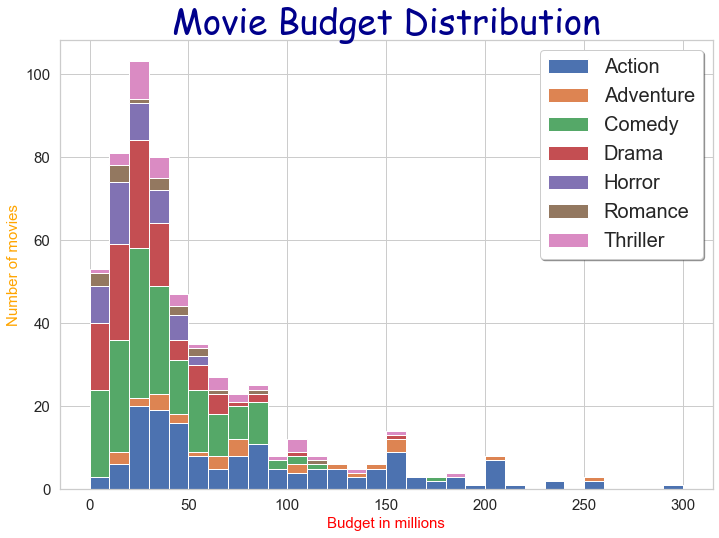

In [72]:
listg = list()
labellist = list()
for gen in movies.Genre.cat.categories:
    listg.append(movies[movies.Genre == gen].Budget)
    labellist.append(gen)
    
sns.set_style("whitegrid") 
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
h4 = plt.hist(listg, bins = 30 , stacked=True, rwidth = 1, label = labellist)

plt.title("Movie Budget Distribution", fontsize = 35, color = "DarkBlue", fontname="Comic Sans MS")

plt.xlabel("Budget in millions", fontsize = 15, color = "Red" )
plt.ylabel("Number of movies", fontsize = 15, color = "Orange" )

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.legend(prop={'size':20}, frameon=True, fancybox=True, shadow=True, framealpha=1)
# to get rid of <matplotlib.legend.Legend at 0x21b84da47c0> text use plt.show()
plt.show()